In [1]:
import pandas as pd
import numpy as np
import math
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
filename = "sap_storing_data_hu_project.csv" 
n = sum(1 for line in open(filename, encoding='utf8'))-1  
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))
df_not_cleaned = pd.read_csv(filename, skiprows=skip)
#verwijder alle kolommen die niet van gebruik zijn:
df = df_not_cleaned.drop(columns=['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 'stm_geo_mld_uit_functiepl', 'stm_scenario_mon', 'stm_status_melding_sap', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_aanntpl_ddt', 'stm_geo_gst_uit_functiepl', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 'stm_veroorz_groep', 'stm_veroorz_code', 'stm_progfh_gw_duur', 'stm_progfh_gw_lwd_tijd', 'stm_progfh_gw_lwd_datum', 'stm_progfh_gw_datum', 'stm_arbeid', 'stm_functiepl_gst', 'stm_functiepl_mld', 'stm_mon_begintijd', 'stm_mon_begindatum', 'stm_aangelegd_tijd', 'stm_aangelegd_dd', 'stm_dir_betrok_tr', 'stm_evb', 'stm_mon_vhdsincident', 'stm_mon_eind_ddt', 'stm_afspr_aanvangddt', 'stm_effect', 'stm_veroorz_tekst_kort', 'stm_projnr', 'stm_wbi_nummer', 'stm_status_gebr', 'stm_standplaats', 'stm_actie', 'stm_hinderwaarde', 'stm_rec_toegev_ddt', 'stm_afsluit_tijd', 'stm_afsluit_dd', 'stm_afsluit_ddt', 'stm_akkoord_melding_jn', 'stm_fact_jn', 'stm_status_sapnaarmon', 'stm_akkoord_mon_toewijz', 'stm_controle_dd', 'stm_mon_eind_tijd', 'stm_mon_eind_datum', 'stm_reactie_duur', 'stm_afspr_aanvangtijd', 'stm_afspr_aanvangdd', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_x_bron_arch_dt', 'stm_x_bron_bestandsnaam', 'stm_x_bron_publ_dt', 'stm_rapportage_jaar', 'stm_rapportage_maand', 'stm_sorteerveld', 'stm_afspr_func_hersteltijd', 'stm_afspr_func_hersteldd', 'stm_relatiervo', 'stm_relatiervo_volgend', 'stm_relatiervo_vorig', 'stm_schade_statusdatum', 'stm_schade_status_ga', 'stm_schadenr', 'stm_x_start_sessie_dt', 'stm_x_bk', 'stm_x_run_id', 'stm_x_actueel_ind', 'stm_x_vervallen_ind'])
print("Done")

c:\users\game pc\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,21,25,32,36,37,38,39,40,47,48,55,75,78,80,82,83,86,87,99,102,108,109,110,111,113,116,118,120,121,122,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done


# Data cleaning:


De te bepalen welke variabelen het meest van toepassing zijn om te gebruiken kijken we naar welke
kolommen informatie geven over de tijd van de melding, monteur. Tijd wanneer de melding word opgelost.
Wat voor melding het is en info over de melding/storing, en de locatie. Zo zijn de volgende kolommen
het meest van toepassing:

Over soort melding
- stm_sap_meldtekst (melding omschrijving)
- stm_geo_mld (melding code) - nodig
- stm_oorz_code (oorzaak code) - nodig
- stm_prioriteit (prioriteit)

Over tijd:
- stm_sap_melddatum (datump melding) - nodig
- stm_sap_meldtijd (tijdstip melding) - nodig
- stm_aanngeb_dd (datum aannemer gebeld)
- stm_aanngeb_tijd (tijd aannemer gebeld)
- stm_aanntpl_dd (datum aannemer op plek)
- stm_aanntpl_tijd (tijd aannemer op plek)

- stm_fh_dd (Datum van functie herstel) - nodig
- stm_fh_tijd (Tijdstip van functieherstel) - nodig
- stm_sap_storeinddatum (Datum einde storing) - nodig
- stm_sap_storeindtijd (Tijdstip einde storing) - nodig
- stm_fh_duur (Duur van functiehersteltijd) - nodig

Over equipment:
- stm_equipm_nr_mld (equipment)
- stm_equipm_omschr_mld (equipment omschrijving)

Over locatie
- stm_km_van_mld (locatie van)
- stm_km_tot_mld (locatie tot)
- stm_vl_post (VL post) - nodig
- stm_contractgeb_mld(locatie melding) - nodig
- stm_pplg_van (PPLG van locatie)
- stm_pplg_naar (PPLG tot locatie)
- stm_dstrglp_van (Dienstregelpunt van locatie)
- stm_dstrglp_naar (Dienstregelpunt tot locatie)

Over prognose:
- stm_progfh_in_datum (Datum prognose)
- stm_progfh_in_tijd (Tijdstip FHT prognose)
- stm_progfh_in_invoer_dat (Invoer datum prognose)
- stm_progfh_in_invoer_tijd (Invoer tijdstip FHT prognose)
- stm_progfh_in_duur (Duur FHT)



In [3]:
#deze functie verwijdert alle rijen waar geen value op de gegeven kolommen zitten
def drop_rows_with_null(lst, df):
    dfisnull = df.isnull()[lst]
    matches = dfisnull[(dfisnull).any(axis=1)]
    return df.drop(matches.index)

In [4]:
#Deze functie berkent de uitschiet grenzen
def uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*1.5)
    minuitschieter = q1 - (iqr*1.5)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van uitschieters in een kolom
def return_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder uitschieters
def return_kolom_zonder_uitschieters(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom


In [5]:
#Deze functie berkent de extreme uitschiet grenzen
def ex_uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*3)
    minuitschieter = q1 - (iqr*3)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van extreme uitschieters in een kolom
def return_ex_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder extreme uitschieters
def return_kolom_zonder_ex_uitschieters(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom



In [6]:
# Verwijder de rijen die geen value bevatten in de benodigde kolommen
df_filtered = drop_rows_with_null(['stm_geo_mld', 'stm_sap_melddatum', 'stm_oorz_code', 'stm_sap_meldtijd',
                          'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd',
                          'stm_fh_duur', 'stm_vl_post', 'stm_contractgeb_mld'], df)
df_filtered = (df_filtered.loc[(df_filtered['stm_fh_duur'] > 5) & (df_filtered['stm_fh_duur'] < 360)])
# hoger dan 5 minuten,als het onder de 5 minuten zit is er een goede kans dat het een fout was.
print(len(df))
print(len(df_filtered))
df_filtered

89850
10687


,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_equipm_nr_mld,stm_equipm_soort_mld,...,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
7,125,50053438,62.0,AH,15/01/2006 23:08:00,Logboeknr RBV : 62 Tijd: 2308 VL-Post: ...,Logboeknr RBV : 62 Tijd: 2308 VL-P,514.0,10201441.0,WISSEL,...,15/01/2006,23:20:00,12.0,15/01/2006,23:20:00,NaN,NaN,NaN,Nm,NaN
17,243,50053652,42.0,RSD,25/01/2006 09:30:00,Logboeknr RBV : 42 Tijd: 0930 VL-Post: ...,Logboeknr RBV : 42 Tijd: 0930 VL-P,127.0,10621371.0,DETECTREIN,...,25/01/2006,09:44:00,14.0,30/01/2006,11:21:00,Geen SMC-melding.Geen onderzoek geweest.,NaN,NaN,Arn,NaN
31,360,50053803,10.0,ASD,05/02/2006 04:39:00,Logboeknr RBV : 10 Tijd: 0439 VL-Post: ...,Logboeknr RBV : 10 Tijd: 0439 VL-P,50.0,10284836.0,SEIN,...,05/02/2006,04:48:00,9.0,05/02/2006,04:48:00,Grendel 13 gestoord door werkzaamheden.,NaN,NaN,Asdm,NaN
37,443,50053928,174.0,EHV,13/02/2006 19:30:00,Logboeknr RBV : 174 Tijd: 1930 VL-Post: ...,Logboeknr RBV : 174 Tijd: 1930 VL-P,55.0,10145283.0,OVERWEG,...,13/02/2006,19:37:00,7.0,14/02/2006,09:23:00,Geen SMC-melding.,NaN,NaN,Hm,NaN
48,564,50054111,115.0,AMF,25/02/2006 15:00:00,Logboeknr RBV : 115 Tijd: 1500 VL-Post: ...,Logboeknr RBV : 115 Tijd: 1500 VL-P,87.0,10286395.0,SEIN,...,25/02/2006,18:00:00,180.0,25/02/2006,18:00:00,Sein 14 afgevallen. PCA geweest.,NaN,NaN,Ndb,Kv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89786,908035,96001297,3979560.0,ZL,19/11/2016 12:51:01,"Hde-Ns : Ovw 64.8 gestoord, P-844 rood, ATB-co...","Hde-Ns : Ovw 64.8 gestoord, P-844 rood,",17.0,10211086.0,OVERWEG,...,19/11/2016,15:00:00,129.0,19/11/2016,16:00:00,Coderelais vervangen.,HDE,NaN,HDE,NS
89789,908057,98000477,137.0,UT,25/04/2006 17:22:00,Bkp P-sein 838 geel gedoofd.,Bkp P-sein 838 geel gedoofd.,546.0,10285261.0,SEIN,...,25/04/2006,19:00:00,97.0,25/04/2006,19:00:00,NaN,NaN,NaN,BLZ,NaN
89812,908312,99003083,977890.0,RTD,25/10/2010 13:31:00,Ddrs-Sdt : ATB terugval voor Baanhoekbrug.,Ddrs-Sdt : ATB terugval voor Baanhoekbru,118.0,10056913.0,TREINBEINV,...,25/10/2010,14:15:00,43.0,27/10/2010,16:00:00,NaN,SDT,NaN,SDT,BMBR
89825,908416,99003167,1994752.0,RTD,09/05/2013 20:33:00,Brd TTI : [2+] Brandmelding Station 2 sprinkl...,Brd TTI : [2+] Brandmelding Station 2 sp,116.0,10590754.0,TUNCONSTR,...,09/05/2013,21:11:00,37.0,09/05/2013,21:30:00,Status gewijzigd van Concept naar Compl,NaN,KFHAZ,KFHAZ,00/00/0000


In [7]:
#uitgeschreven lijsten zodat ik ze niet steeds hoef over te typen

# melding
df[['stm_sap_meldtekst', 'stm_geo_mld', 'stm_oorz_code', 'stm_prioriteit']]
# tijd
df[['stm_sap_melddatum', 'stm_sap_meldtijd', 'stm_aanngeb_dd', 'stm_aanngeb_tijd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd']]
df[['stm_fh_dd', 'stm_fh_tijd', 'stm_fh_duur', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd']]
# equipment
df[['stm_equipm_omschr_mld', 'stm_equipm_nr_mld']]
# locatie
df[['stm_km_van_mld', 'stm_km_tot_mld', 'stm_vl_post', 'stm_contractgeb_mld', 'stm_pplg_van', 'stm_pplg_naar', 'stm_dstrglp_van', 'stm_dstrglp_naar']]
# prognose
df[['stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_in_duur']]


,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur
0,NaN,00:00:00,NaN,00:00:00,1e+08
1,NaN,00:00:00,NaN,00:00:00,1e+08
2,NaN,00:00:00,NaN,00:00:00,1e+08
3,NaN,00:00:00,NaN,00:00:00,1e+08
4,NaN,00:00:00,NaN,00:00:00,1e+08
...,...,...,...,...,...
89845,10/06/2013,16:00:00,13/05/2013,11:29:55,40598
89846,10/06/2013,16:00:00,13/05/2013,11:29:55,40598
89847,10/05/2013,19:30:00,10/05/2013,19:34:59,4
89848,13/05/2013,03:30:00,13/05/2013,03:31:05,180


# Baseline
Target variabele is 'stm_fh_duur'. Dit is de functie hersteltijd dit houd in dat vanaf de melding tot dat het probleem opgelost is getimed wordt. 

baseline:  

In [8]:
# De target variabele filteren tussen de 0 min en 360 min. Prodcut ower gaf dit als grens aan. 
data_fht = df_filtered['stm_fh_duur'].loc[(df_filtered['stm_fh_duur'] > 0) & (df_filtered['stm_fh_duur'] < 360)]
data_fht

7         12.0
17        14.0
31         9.0
37         7.0
48       180.0
         ...  
89786    129.0
89789     97.0
89812     43.0
89825     37.0
89830    246.0
Name: stm_fh_duur, Length: 10687, dtype: float64

In [9]:
data_fht.describe()

count    10687.000000
mean       103.383644
std         73.148454
min          6.000000
25%         52.000000
50%         83.000000
75%        134.000000
max        359.000000
Name: stm_fh_duur, dtype: float64

In [10]:
data_fht.mean()

103.38364367923646

In [11]:
data_fht.median()

83.0

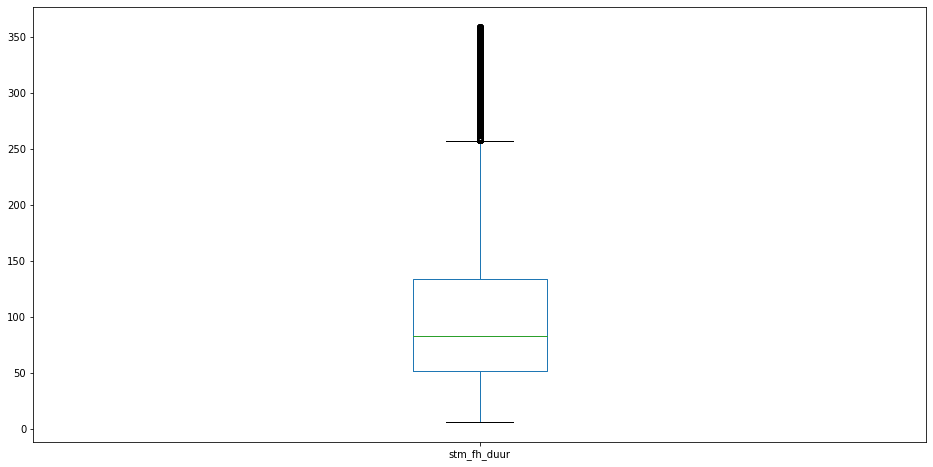

In [12]:
data_fht.plot.box(figsize=(16,8))

In [13]:
len(data_fht[data_fht < data_fht.mean()])

6617

In [14]:
len(data_fht[data_fht < data_fht.mean()])/len(data_fht)*100

61.91634696360063

In [15]:
len(data_fht[data_fht < data_fht.median()])/len(data_fht)*100

49.649106390942265

61% van alle herstel tijden zit onder het gemiddelde 102 min

50% van alle herstel tijden zit onder de mediaan 82 min



In [16]:
data_fht = data_fht.to_frame()
data_fht['mediaan'] = data_fht['stm_fh_duur'].median()
data_fht['mean'] = data_fht['stm_fh_duur'].mean()
data_fht.head()

,stm_fh_duur,mediaan,mean
7,12.0,83.0,103.383644
17,14.0,83.0,103.383644
31,9.0,83.0,103.383644
37,7.0,83.0,103.383644
48,180.0,83.0,103.383644


In [17]:
# de score bepalen aan de hand van de RSME
np.sqrt(mean_squared_error(data_fht.loc[:,'stm_fh_duur'],data_fht.loc[:,'mean']))

73.14503171081641

In [18]:
#de score bepalen aan de hand van de RSME
np.sqrt(mean_squared_error(data_fht.loc[:,'stm_fh_duur'],data_fht.loc[:,'mediaan']))

75.93213149660963

# KNeighborsregression

In [19]:
data_KN = df_filtered[['stm_km_van_mld', 'stm_prioriteit']]

In [20]:
df_filtered['stm_sap_meld_ddt'] = df_filtered['stm_sap_meld_ddt'].apply(pd.to_datetime)

In [21]:
df_year = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.year)
df_filtered.insert(5, 'Jaar', df_year)

In [22]:
df_day = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.dayofyear)
df_filtered.insert(6, 'Dag_van_jaar', df_day)

In [23]:
df_hour = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.hour)
df_filtered.insert(7, 'Uur_van_dag', df_hour)

In [24]:
df_min = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.minute)
df_filtered.insert(8, 'Minuut_van_uur', df_min)

In [25]:
df_hour_min = (df_filtered['Uur_van_dag'] * 60) + df_filtered['Minuut_van_uur']
df_filtered.insert(9, 'Minuut_van_dag', df_hour_min)

In [26]:
X = df_filtered[['stm_km_van_mld', 'stm_prioriteit', 'Dag_van_jaar', 'Jaar', 'Minuut_van_dag']]
y = df_filtered[['stm_fh_duur']]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf

KNeighborsClassifier()

In [29]:
clf.fit(X_train, y_train)

c:\users\game pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [30]:
y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print('Accuracy traindata')
print(accuracy_score(y_train, y_pred_train))

print('')
print('Accuracy testdata')
print(accuracy_score(y_test, y_pred_test))

Accuracy traindata
0.2667914327302974

Accuracy testdata
0.02806361085126286


# linear regression 

In [32]:
afstand = ['stm_km_tot_mld']
tijd = ['stm_fh_duur']
X= df_filtered[afstand]
y= df_filtered[tijd]

In [33]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=None) 

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_reg_model = LinearRegression()

In [36]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error

y_pred_test = linear_reg_model.predict(X_test)

error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print(error_metric)

5305.869328120281


# extra tree classifier

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

In [39]:
afstand = ['stm_km_tot_mld']
tijd = ['stm_fh_duur']
X= df_filtered[afstand]
y= df_filtered[tijd].values.ravel()

In [40]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=None) 

In [41]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [42]:
X_test

,stm_km_tot_mld
79754,14444.0
71311,0.0
70517,0.0
81922,73265.0
58005,0.0
...,...
34770,23800.0
54846,0.0
56928,161600.0
52157,0.0


In [43]:
y_test

array([289., 107.,  60., ...,  50.,  81., 135.])

In [44]:
clf.fit(X_train, y_train)

MemoryError: could not allocate 22872064 bytes

In [ ]:
clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [ ]:
confusion_matrix(list(y_test), clf.predict(X_test))

In [ ]:
accuracy_score(list(y_test), clf.predict(X_test))

In [ ]:
y.shape

In [ ]:
X.shape